In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [2]:
train=pd.read_csv('C:/Users/sun/Desktop/Univ/4_1/MediaProject/Project2/agg_match_stats_4.csv')

In [3]:
data=train.copy()

In [4]:
data.head()

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,37.919838,20,0,m3xdave,106.351,100000,88
1,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,292.205048,3457.036130,387,3,UDaddyHere,1690.021,100006,8
2,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,106.215900,0,0,Dummy05,103.415,100010,89
3,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,126.959831,91,0,NA-Wuyifan,272.838,100019,67
4,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,43.346710,0,0,kickinchicken,134.342,100024,81


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11993485 entries, 0 to 11993484
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   date                 object 
 1   game_size            int64  
 2   match_id             object 
 3   match_mode           object 
 4   party_size           int64  
 5   player_assists       int64  
 6   player_dbno          int64  
 7   player_dist_ride     float64
 8   player_dist_walk     float64
 9   player_dmg           int64  
 10  player_kills         int64  
 11  player_name          object 
 12  player_survive_time  float64
 13  team_id              int64  
 14  team_placement       int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 1.3+ GB


In [6]:
data_solo=data[data['party_size']==1]
data_duo=data[data['party_size']==2]
data_squad=data[data['party_size']==4]

In [7]:
#각 게임 모드마다 상위권, 하위권 나누기 상위권: 20위 이내, 하위권: 70등 내
data_solo_top=data_solo[data_solo['team_placement']<=20]
data_solo_low=data_solo[(data_solo['team_placement']>20)&(data_solo['team_placement']<=70)]

data_duo_top=data_duo[data_duo['team_placement']<=20]
data_duo_low=data_duo[(data_duo['team_placement']>20)&(data_duo['team_placement']<=70)]

data_squad_top=data_squad[data_squad['team_placement']<=20]
data_squad_low=data_squad[(data_squad['team_placement'])>20&(data_squad['team_placement']<=70)]

In [12]:

label=['player_assists','player_dbno','player_dist_ride', 'player_dist_walk','player_dmg', 'player_kills','player_survive_time']
#top그룹과 low그룹의 평균값 비교 막대그래프 그리기

def top_low_compare(top_df,low_df):
    fig, axs = plt.subplots(1, 7, figsize=(20, 5))
    for i in range(len(label)):
        axs[i].bar(['top','low'],[top_df[label[i]].mean(), low_df[label[i]].mean()])
        axs[i].set_title(label[i])

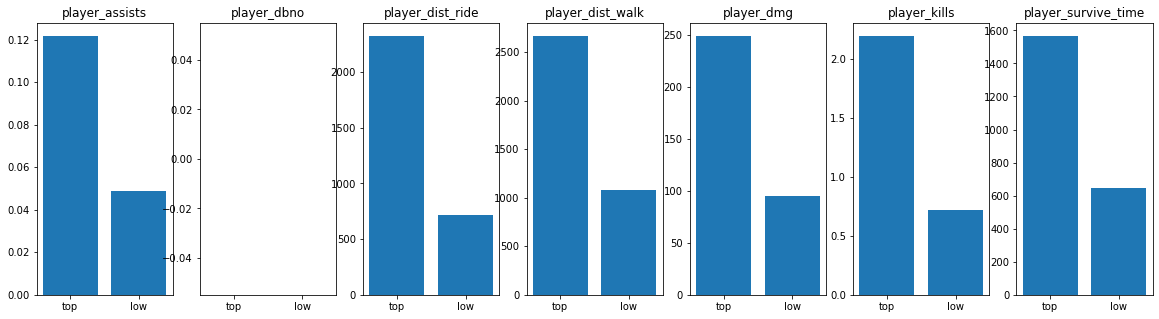

In [9]:
top_low_compare(data_solo_top,data_solo_low)

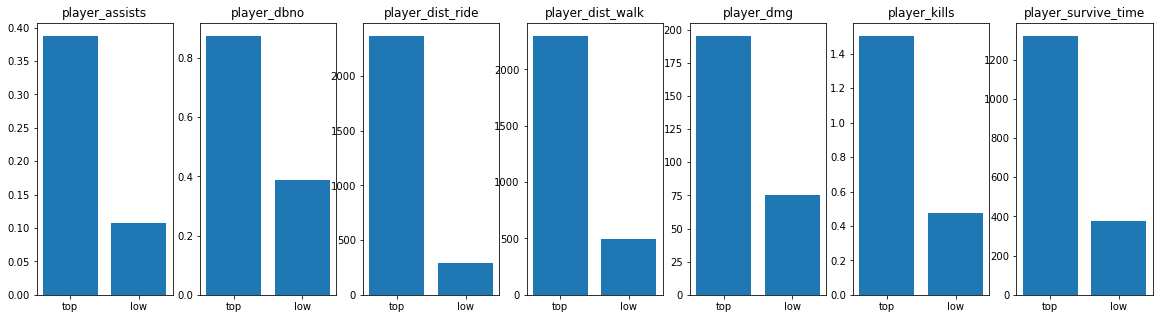

In [10]:
top_low_compare(data_duo_top,data_duo_low)

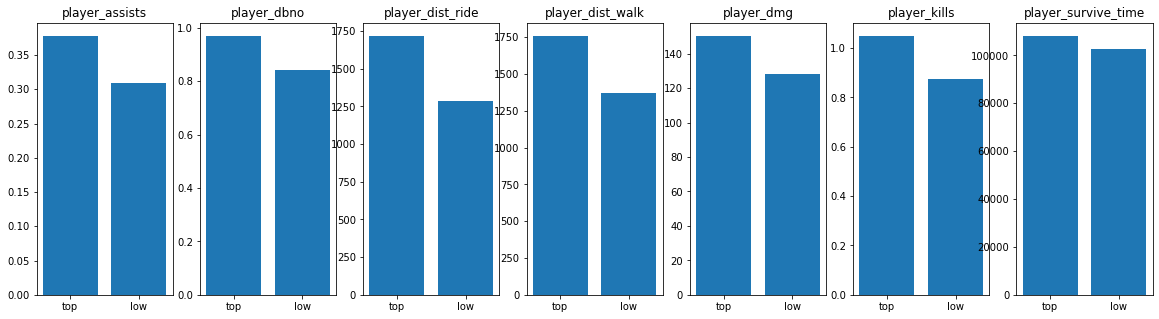

In [11]:
top_low_compare(data_squad_top,data_squad_low)